In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# use transformers to translate the text above from german into english
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-de-en")

model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-de-en")

c:\Users\asian\miniconda3\envs\medfarm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('diga.csv')
df.head()

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values
0,CANKADO PRO-React Onco,"CANKADO GmbH, Deutschland",partners.cankado.com/about/,vorläufig aufgenommen,03.05.2021,02.05.2023,PRO-React Onco ist eine Web- und App-basierte ...,C50,Bösartige Neubildung der Brustdrüse Mamma,399.84,"Keine Zusatzgeräte, Vertragsärztliche Leistung..."
1,Cara Care für Reizdarm,"HiDoc Technologies GmbH, Deutschland",cara.care/de/about/,vorläufig aufgenommen,26.12.2021,25.11.2023,Cara Care für Reizdarm ist eine digitale Gesun...,"K58, K58.1, K58.2, K58.3, K58.8","Reizdarmsyndrom, Reizdarmsyndrom, Diarrhoe-prä...",718.20,"Keine Zusatzgeräte, Keine vertragsärztlichen L..."
2,companion patella powered by medi - proved by ...,"PrehApp GmbH, Deutschland",prehapp.de,vorläufig aufgenommen,04.10.2021,03.03.2023,companion patella powered by medi - proved by ...,"M22.2, M22.4, M76.5, M79.66, S83.0","Krankheiten im Patellofemoralbereich, Chondrom...",345.10,"Keine Zusatzgeräte, Vertragsärztliche Leistung..."
3,deprexis,"GAIA AG, Deutschland",gaia-group.com/de/,Dauerhaft aufgenommen,NaN,NaN,deprexis ist ein interaktives onlinebasiertes ...,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2","Leichte depressive Episode, Mittelgradige depr...",210.00,"Keine Zusatzgeräte, Keine vertragsärztlichen L..."
4,edupression.com®,"SOFY GmbH, Österreich",edupression.com/,vorläufig aufgenommen,26.12.2022,25.08.2023,Die DiGA edupression.com® besteht aus dem Medi...,"F32.0, F32.1, F33.0, F33.1","Leichte depressive Episode, Mittelgradige depr...",178.50 - 357.00,"Keine Zusatzgeräte, Keine vertragsärztlichen L..."


The Indication Code (ICD code) is a globally recognized system that is used to consistently label medical diagnoses. ICD stands for “International Statistical Classification of Diseases and Related Health Problems”.

In [4]:
## Weitere Fragestellungen:
# - natural language prompting to find the right indication code
# - mapping with google maps or other maps?



In [5]:
# print the total number of apps
print("Total number of apps in the dataset = ", len(df))
# print the total number of unique developers
print("Total number of unique developers in the dataset = ", len(df['developer_info'].unique()))

Total number of apps in the dataset =  37
Total number of unique developers in the dataset =  27


<AxesSubplot: title={'center': 'Top 5 Developer Info'}>

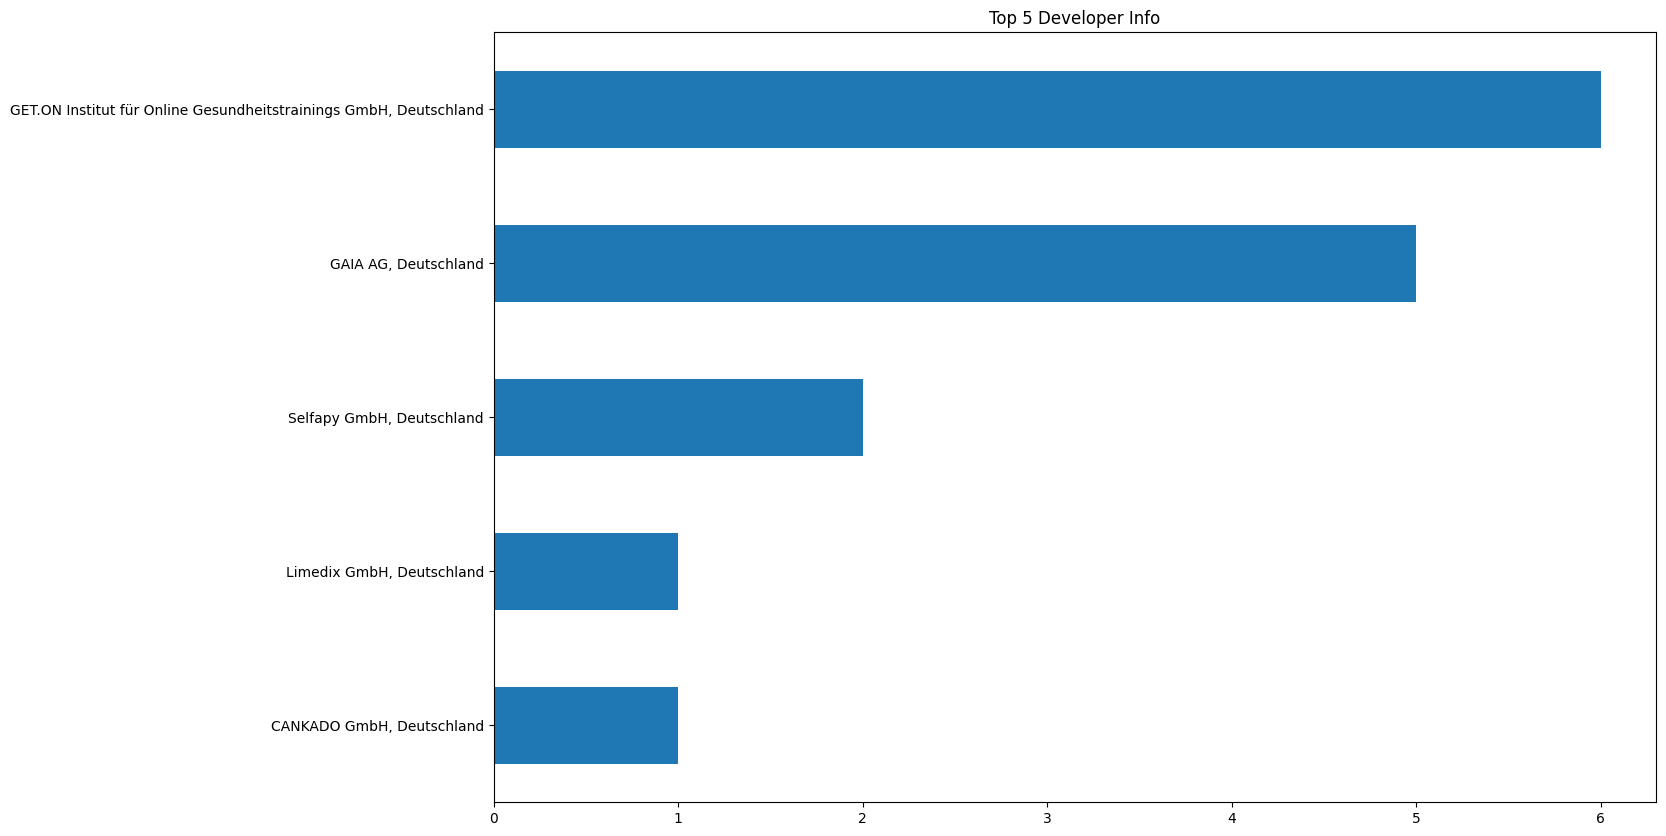

In [6]:
df['developer_info'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', figsize=(15,10), title='Top 5 Developer Info')

<AxesSubplot: >

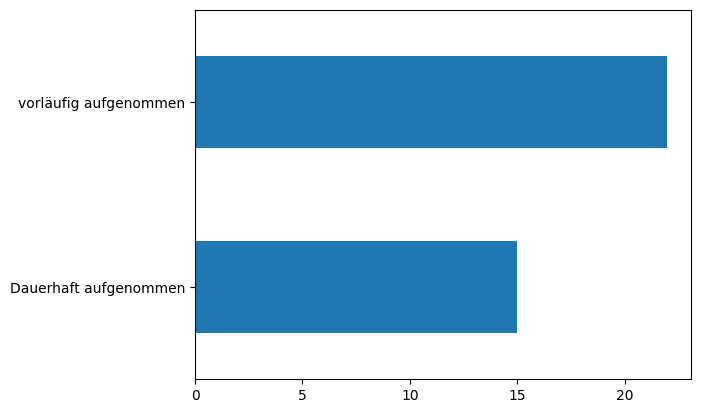

In [7]:
# visualize the total count of app statuses
df['app_status'].value_counts().sort_values(ascending=True).plot(kind='barh')

The average price = 435.9467567567567
Min = 119.0
Min = 952.0
Min = 449.0


<AxesSubplot: >

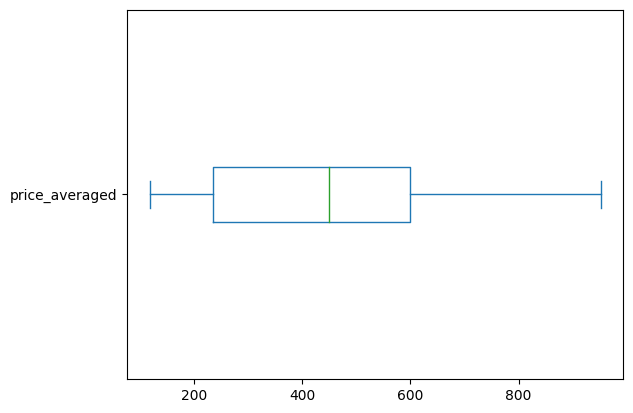

In [8]:
## visualize the average price of all apps
# convert price to float
# if df['price'] contains -, calculate the mean by taking the average of the two numbers
df['price_averaged'] = df['price'].str.replace(' ', '')
df['price_averaged'] = df['price_averaged'].str.replace('-', ' ')
df['price_averaged'] = df['price_averaged'].str.split(' ')
df['price_averaged'] = df['price_averaged'].apply(lambda x: (float(x[0]) + float(x[1]))/2 if len(x) > 1 else float(x[0]))
print(f'The average price = {df["price_averaged"].mean()}')
# calcuated the min and max price
print(f'Min = {df["price_averaged"].min()}')
print(f'Min = {df["price_averaged"].max()}')
print(f'Min = {df["price_averaged"].median()}')
# visualize a boxplot of the prices (middle line is the median)
df['price_averaged'].plot(kind='box', vert=False) 

In [9]:
# select all individual indication codes
indication_codes = df['indication_codes'].str.split(',').tolist()
counts = [len(sublist) for sublist in indication_codes]


indication_codes = [item for sublist in indication_codes for item in sublist]
# remove empty spaces
indication_codes = [x.strip() for x in indication_codes]
# remove duplicates
indication_codes_unique = list(set(indication_codes))
# print the total number of indication codes
print(f'The total number of covered indications is: {len(indication_codes)} different indications')

The total number of covered indications is: 112 different indications


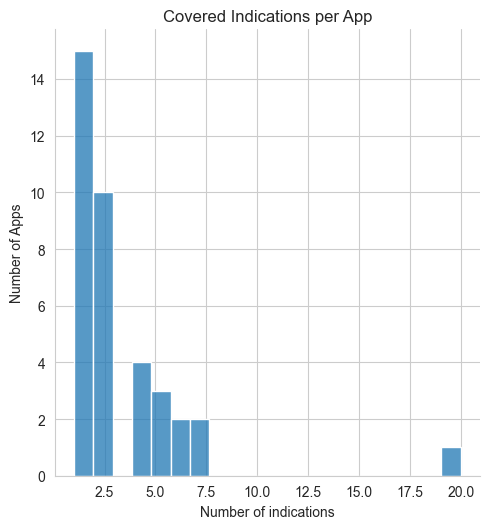

In [10]:
# visualize the distribution of the number of indication codes per app
sns.set_style("whitegrid")

# plot boxplot
gfg = sns.displot(data=counts, kde=False, rug=False, bins=20)

# add label to the axis and label to the plot
gfg.set(xlabel ="Number of indications", ylabel = "Number of Apps", title ='Covered Indications per App')


In [12]:
# select the app with the most indication codes
df[df['indication_codes'].str.split(',').str.len().max() == df['indication_codes'].str.split(',').str.len()]

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values,price_averaged
34,Vivira,"Vivira Health Lab GmbH, Deutschland",www.vivira.com,Dauerhaft aufgenommen,NaN,NaN,Die DiGA Vivira ist eine durch das BfArM endgü...,"M42.0, M42.1, M42.9, M53.2, M53.8, M53.9, M54....","Juvenile Osteochondrose der Wirbelsäule, Osteo...",239.96,"Keine Zusatzgeräte, Vertragsärztliche Leistung...",239.96


In [30]:
indication_text_max = df[df['indication_codes'].str.split(',').str.len().max() == df['indication_codes'].str.split(',').str.len()].indication_names.values
indication_text_max[0]

'Juvenile Osteochondrose der Wirbelsäule, Osteochondrose der Wirbelsäule beim Erwachsenen, Osteochondrose der Wirbelsäule, nicht näher bezeichnet, Instabilität der Wirbelsäule, Sonstige näher bezeichnete Krankheiten der Wirbelsäule und des Rückens, Krankheit der Wirbelsäule und des Rückens, nicht näher bezeichnet, Lumboischialgie, Kreuzschmerz, Schmerzen im Bereich der Brustwirbelsäule, Sonstige Rückenschmerzen, Rückenschmerzen, nicht näher bezeichnet, Segmentale und somatische Funktionsstörungen: Thorakalbereich thorakolumbal, Segmentale und somatische Funktionsstörungen: Lumbalbereich lumbosakral, Segmentale und somatische Funktionsstörungen: Sakralbereich sakrokokzygeal, sakroiliakal, Sonstige biomechanische Funktionsstörungen: Thorakalbereich thorakolumbal, Sonstige biomechanische Funktionsstörungen: Lumbalbereich lumbosakral, Sonstige biomechanische Funktionsstörungen: Sakralbereich sakrokokzygeal, sakroiliakal, Biomechanische Funktionsstörung, nicht näher bezeichnet: Thorakalbere

In [39]:
max_indications_list = [i for i in indication_text_max[0].split(',')]
# tokenize the text
tokenized_text = tokenizer(max_indications_list, padding=True, truncation=True, return_tensors="pt")

#translate the text
translated_text = model.generate(**tokenized_text)

# decode the text
translated_text = tokenizer.batch_decode(translated_text, skip_special_tokens=True)

In [38]:
print(translated_text)

['Juvenile osteochondrosis of the spine', 'Osteochondrosis of the spine in adults', 'Osteochondrosis of the spine', 'Not specified', 'Instability of the spine', 'Other more detailed diseases of the spine and back', 'Disease of the spine and back', 'Not specified', 'Lumboischialgia', 'Cross pain', 'Chest vertebra pain', 'Other back pain', 'Back pain', 'Not specified', 'Segmental and somatic dysfunction: thoracal range thorakolumbal', 'Segmental and somatic dysfunction: Lumbal area lumbosacral', 'Segmental and somatic dysfunctions: sacral area sacrococzygeal', 'sacroiliakal', 'Other biomechanical dysfunctions: thoracal range thoracolumbal', 'Other biomechanical dysfunctions: Lumbal area lumbosacral', 'Other biomechanical dysfunctions: sacral area sacrococcygeal', 'sacroiliakal', 'Biomechanical dysfunction', 'not specified: thoracal range thorakolumbal', 'Biomechanical dysfunction', 'not specified: Lumbal area lumbosacral', 'Biomechanical dysfunction', 'not specified: sacral area sacrococ

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


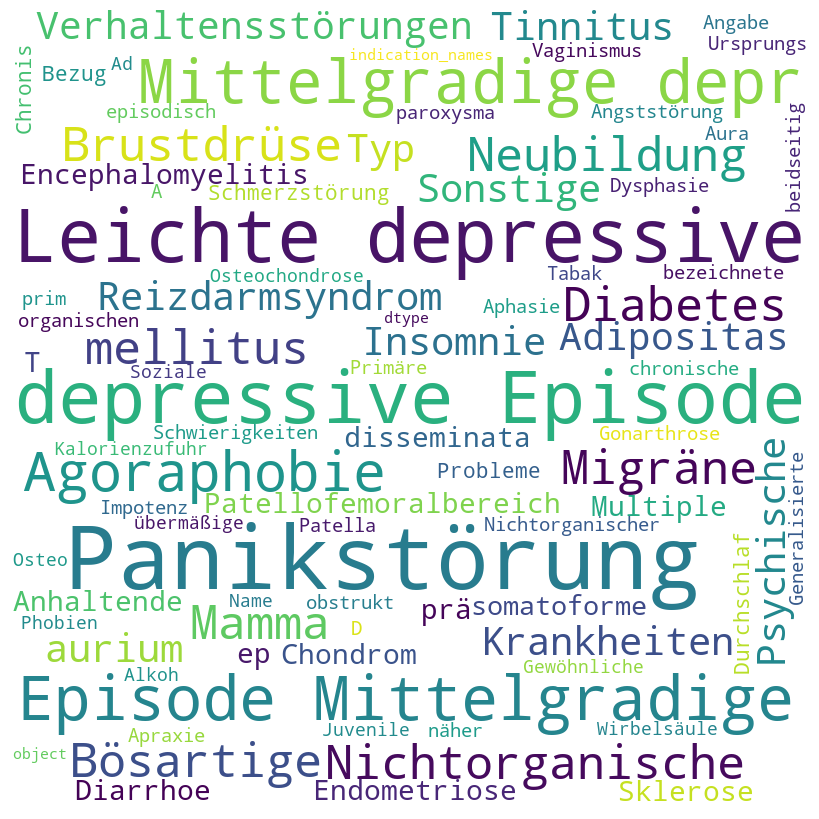

In [14]:
# draw a wordcloud
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud

stopwords = stopwords.words('german')

wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(str(df['indication_names']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [48]:
indications_text_full = df['indication_names'].values
indications_text_full = [i for i in indications_text_full]

In [69]:
# translate df['indication_names'] into english
# tokenize the text
tokenized_text = tokenizer(indications_text_full, padding=True, truncation=True, return_tensors="pt")

#translate the text
translated_text = model.generate(**tokenized_text, num_beams=4, early_stopping=True, max_length=512)


# decode the text
translated_text_full = tokenizer.batch_decode(translated_text, skip_special_tokens=True)
translated_text = ','.join(translated_text_full)
translated_text

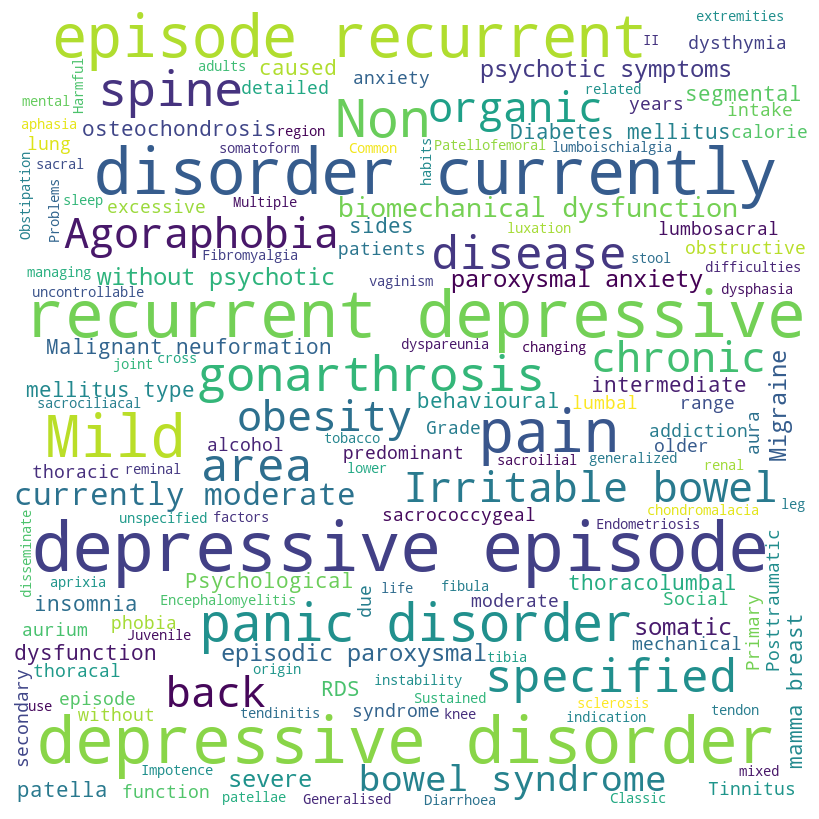

In [83]:
# create wordcloud on decoded_text2
wordcloud = WordCloud(stopwords=stop_words, width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(translated_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [84]:
# count the values of the indication codes
indication_codes = df['indication_codes'].str.split(',').tolist()
indication_codes = [item for sublist in indication_codes for item in sublist]
# remove empty spaces
indication_codes = [x.strip() for x in indication_codes]
# count the number of occurences of each indication code
from collections import Counter
indication_codes_count = Counter(indication_codes)
indication_codes_count

# select the top 10 indication codes 
top5 = indication_codes_count.most_common(5)

In [85]:
most_wanted_indications = []
for i in top5:
    i = i[0]
    # select the first app with the indication code
    app = df[df['indication_codes'].str.contains(i)].iloc[0]
    # find the index of the indication code
    index = [x.strip() for x in app['indication_codes'].split(',')].index(i)
    # find the indication_names for the indication code
    indication_name = app['indication_names'].split(',')[index]
    # add the indication name to the a list 
    most_wanted_indications.append(indication_name)
print(f'the top 5 most wanted indications are: \n{most_wanted_indications}')

the top 5 most wanted indications are: 
['Leichte depressive Episode', ' Mittelgradige depressive Episode', ' Rezidivierende depressive Störung', ' gegenwärtig leichte Episode', ' Panikstörung episodisch paroxysmale Angst']


In [86]:

# tokenize the text
tokenized_text = tokenizer(most_wanted_indications, padding=True, truncation=True, return_tensors="pt")

#translate the text
translated_text = model.generate(**tokenized_text, max_length=100, num_beams=4, early_stopping=True)

# decode the text
most_wanted_indications_eng = tokenizer.batch_decode(translated_text, skip_special_tokens=True)


In [95]:
print(f'the top 5 most wanted indications:')
for i in range(len(most_wanted_indications_eng)):
    print(f'{most_wanted_indications_eng[i]} with a total of - {top5[i][1]} apps -')

the top 5 most wanted indications:
Slightly depressive episode with a total of - 5 apps -
Middle Depressive Episode with a total of - 5 apps -
Recurrent depressive disorder with a total of - 5 apps -
at present light episode with a total of - 5 apps -
Panic disorder Episodic paroxysmal anxiety with a total of - 4 apps -


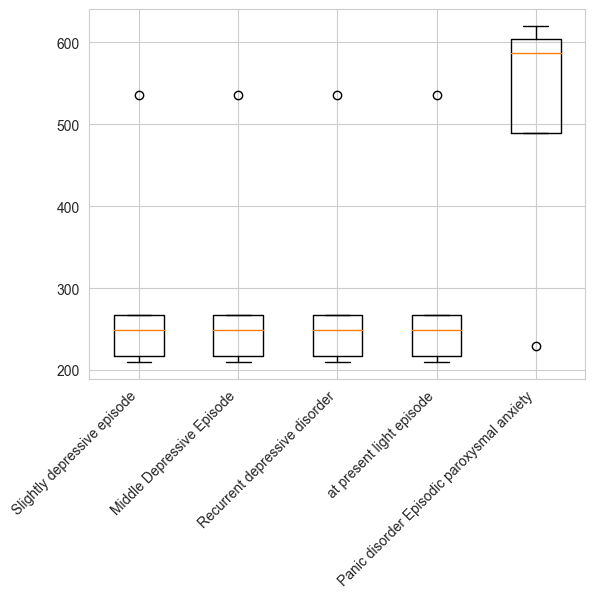

[535.49] ['elona therapy Depression']
[535.49] ['elona therapy Depression']
[535.49] ['elona therapy Depression']
[535.49] ['elona therapy Depression']
[230.] ['velibra']


In [96]:
apps_list = []
for i in top5:
    i = i[0]
    # select the first app with the indication code
    apps = df[df['indication_codes'].str.contains(i)]
    # add the apps to the list
    apps_list.append([apps['price_averaged']])

# get the values of a series apps_list[0][0]
apps_cost = [i[0].values for i in apps_list]
# visualize a list of boxplots
fig, ax = plt.subplots()
# 
bp = ax.boxplot(apps_cost)
ax.set_xticklabels(most_wanted_indications_eng, rotation=45, ha='right')
plt.show()
for outlier_path in bp['fliers']:
    outlier_data = outlier_path.get_data()[1]
    name = df[df['price_averaged'] == outlier_data[0]].app_name.values
    print(outlier_data, name)


In [ ]:
df[df['app_name'] == 'elona therapy Depression']

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values,price_averaged
6,elona therapy Depression,"Elona Health GmbH, Deutschland",www.elona.health,vorläufig aufgenommen,26.12.2022,25.12.2023,elona therapy Depression ist die digitale Gesu...,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2, F34.1","Leichte depressive Episode, Mittelgradige depr...",535.49,"Keine Zusatzgeräte, Vertragsärztliche Leistung...",535.49


In [ ]:
df[df['app_name'] == 'velibra']

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values,price_averaged
32,velibra,"GAIA AG, Deutschland",gaia-group.com/de/,Dauerhaft aufgenommen,NaN,NaN,velibra ist ein webbasiertes Programm für Pati...,"F40.01, F40.1, F41.0, F41.1","Agoraphobie: Mit Panikstörung, Soziale Phobien...",230.00,"Keine Zusatzgeräte, Keine vertragsärztlichen L...",230.0


In [100]:
# lowest price for the top1 indication code
indication1 = top5[0][0]
# choose the app with the highest price for the indication
sorted_df = df[df['indication_codes'].str.contains(indication1)].sort_values(by='price_averaged', ascending=True)
# show only the first, fourth and last column

sorted_df[['app_name', 'app_status', 'price_averaged', 'indication_codes']]

,app_name,app_status,price_averaged,indication_codes
3,deprexis,Dauerhaft aufgenommen,210.00,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2"
28,Selfapys Online-Kurs bei Depression,Dauerhaft aufgenommen,217.18,"F32.0, F32.1, F33.0, F33.1"
23,Novego: Depressionen bewältigen,vorläufig aufgenommen,249.00,"F32.0, F32.1, F33.0, F33.1, F34.1"
4,edupression.com®,vorläufig aufgenommen,267.75,"F32.0, F32.1, F33.0, F33.1"
6,elona therapy Depression,vorläufig aufgenommen,535.49,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2, F34.1"


In [101]:
# pca??

ModuleNotFoundError: No module named 'texthero'